In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

In [89]:
import requests  

url = 'https://www.forex.in.rs/silver-price-history/'
response = requests.get(url)
from bs4 import BeautifulSoup
tree = BeautifulSoup(response.content, 'html.parser')
data = tree.find_all('table', {'class' : 'tablepress tablepress-id-87 tablepress-responsive'})
a=({'date': data[0].find_all('td', {'class': 'column-1'}), 
    'price': data[0].find_all('td', {'class': 'column-2'})})
df_1=pd.DataFrame(a['price'], columns=['Silver'])
df_2=pd.DataFrame(a['date'], columns=['Date'])
df_2.index.rename('num', inplace= True )
df_1.index.rename('num', inplace= True )
df_silver = pd.concat([
    df_2,
    df_1],
    axis=1)
df_silver.head()

,Date,Silver
num,,
0,1915-01-01,13.59
1,1915-02-01,13.73
2,1915-03-01,13.87
3,1915-04-01,13.73
4,1915-05-01,13.59


In [90]:
df_oil=pd.read_csv('WTISPLC.csv')
df_oil.rename(columns={'DATE':'Date', 'WTISPLC':'Oil'}, inplace=True)
df_oil.head()

,Date,Oil
0,1946-01-01,1.17
1,1946-02-01,1.17
2,1946-03-01,1.17
3,1946-04-01,1.27
4,1946-05-01,1.27


In [91]:
df_sp=pd.read_csv('data_csv (1).csv')
df_sp=df_sp.loc[df_sp['Date']>='1950-01-01']
df_sp.drop(['Real Price','Real Dividend', 'Real Earnings'] , axis=1, inplace=True)
df_sp.rename(columns={'PE10':'CAPE'}, inplace=True)
df_sp.index=range(0,len(df_sp))
#s=[1]
#s.extend(list(a))
#df_sp['Discount']=1/np.array(s)
#df_sp.tail()

In [92]:
df_gold=pd.read_csv('data_csv (3).csv')
df_gold.rename(columns={'date':'Date', 'price':'Gold'}, inplace=True)
df_gold.head()

,Date,Gold
0,1950-01-01,34.73
1,1950-02-01,34.73
2,1950-03-01,34.73
3,1950-04-01,34.73
4,1950-05-01,34.73


In [93]:
df=df_gold.merge(df_sp)
df=df.merge(df_oil)
df=df.merge(df_silver)
df.head(100)

,Date,Gold,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,CAPE,Oil,Silver
0,1950-01-01,34.73,16.88,1.15,2.34,23.5,2.32,10.75,2.57,8.48
1,1950-02-01,34.73,17.21,1.16,2.35,23.5,2.34,10.91,2.57,8.48
2,1950-03-01,34.73,17.35,1.17,2.37,23.6,2.36,10.91,2.57,8.44
3,1950-04-01,34.73,17.84,1.18,2.43,23.6,2.38,11.18,2.57,8.44
4,1950-05-01,34.73,18.44,1.19,2.48,23.7,2.40,11.46,2.57,8.4
...,...,...,...,...,...,...,...,...,...,...
95,1957-12-01,34.99,40.33,1.79,3.37,28.4,3.21,13.67,3.00,8.72
96,1958-01-01,35.01,41.12,1.78,3.29,28.6,3.09,13.79,3.07,8.38
97,1958-02-01,35.08,41.26,1.78,3.22,28.6,3.05,13.78,3.07,8.38
98,1958-03-01,35.09,42.11,1.77,3.14,28.8,2.98,13.93,3.07,8.32


In [94]:
df.dropna(inplace=True)
df.shape

(816, 10)

Создание новых признаков. Создание колонки "Инфляция" через CPI.

In [95]:
a=[]
for i in range(1,len(df)):
    a.append(df['Consumer Price Index'][i]/df['Consumer Price Index'][i-1])
a=np.array(a)
a=a-1
a=a.round(3)
s=[0]
s.extend(list(a))

In [96]:
df['Inflation(%)']=np.array(s)
df.head(10)

,Date,Gold,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,CAPE,Oil,Silver,Inflation(%)
0,1950-01-01,34.73,16.88,1.15,2.34,23.5,2.32,10.75,2.57,8.48,0.000
1,1950-02-01,34.73,17.21,1.16,2.35,23.5,2.34,10.91,2.57,8.48,0.000
2,1950-03-01,34.73,17.35,1.17,2.37,23.6,2.36,10.91,2.57,8.44,0.004
3,1950-04-01,34.73,17.84,1.18,2.43,23.6,2.38,11.18,2.57,8.44,0.000
4,1950-05-01,34.73,18.44,1.19,2.48,23.7,2.40,11.46,2.57,8.4,0.004
5,1950-06-01,34.73,18.74,1.20,2.54,23.8,2.42,11.55,2.57,8.37,0.004
6,1950-07-01,34.73,17.38,1.24,2.60,24.1,2.44,10.54,2.57,8.27,0.013
7,1950-08-01,34.73,18.43,1.29,2.66,24.3,2.47,11.04,2.57,8.2,0.008
8,1950-09-01,34.73,19.08,1.33,2.72,24.4,2.49,11.34,2.57,8.16,0.004
9,1950-10-01,34.73,19.87,1.38,2.76,24.6,2.51,11.66,2.57,8.1,0.008


In [97]:
df['Silver']=df['Silver'].astype('float')

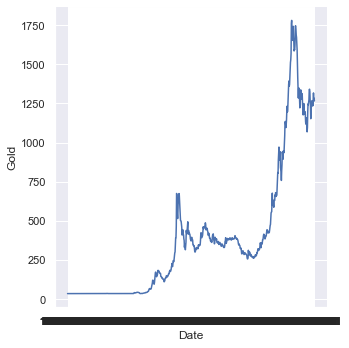

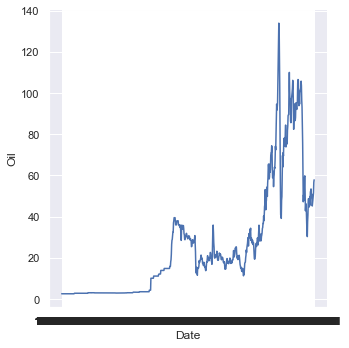

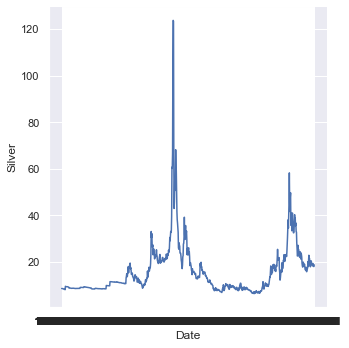

In [98]:
#fig, axes=plt.subplots(1,3, figsize=(18,10))
sns.relplot(kind='line', y=df['Gold'], x=df['Date'])
sns.relplot(kind='line', y=df['Oil'], x=df['Date'])
sns.relplot(kind='line', y=df['Silver'],x=df['Date'])

Как мы видим на всех графиках одну интересную вещь- цена остается примерно на одном и том же уровне до определенной даты- это обусловлено технологическим прогрессом и увеличением экономической активности. 

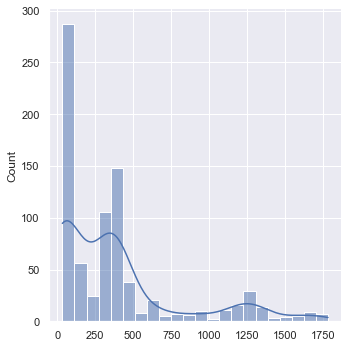

In [99]:
gold=np.array(df['Gold'])
sns.displot(gold, kde=True)

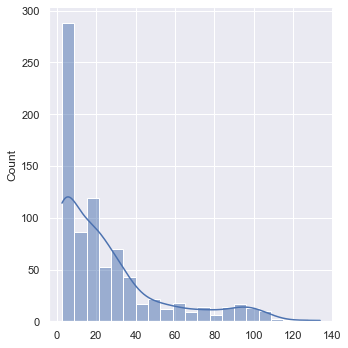

In [100]:
Oil=np.array(df['Oil'])
sns.displot(Oil, kde=True)

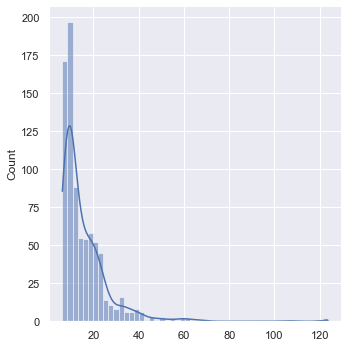

In [101]:
silver=np.array(df['Silver'])
sns.displot(silver, kde=True)

По графику распределения цены серебра мы можем заметить, что цена на серебро имеет гамма-распределение. 

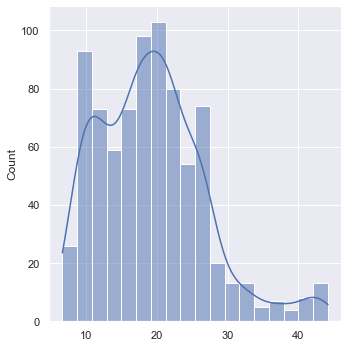

In [102]:
cape=np.array(df['CAPE'])
sns.displot(cape, kde=True)

Так же на графиках распределений мы можем заметить, что есть сильные выбросы в ценах активов. 

Попробуем убрать все выбросы.

In [103]:
dff=df.loc[(df['Gold']>40)& (df['Silver']<100)]
print(dff.shape)
dff.head()

(571, 11)


,Date,Gold,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,CAPE,Oil,Silver,Inflation(%)
220,1968-05-01,40.691,97.87,2.98,5.53,34.5,5.87,21.63,3.07,18.96,0.003
221,1968-06-01,41.111,100.50,2.99,5.57,34.7,5.72,22.00,3.07,19.40,0.006
224,1968-09-01,40.203,101.30,3.03,5.66,35.1,5.46,21.68,3.07,16.37,0.003
227,1968-12-01,41.113,106.50,3.07,5.76,35.5,6.03,22.28,3.07,14.97,0.003
228,1969-01-01,42.291,102.00,3.08,5.78,35.6,6.04,21.19,3.07,15.13,0.003


Таким образом мы отсекли участок на графиках, где не было существенных колебаний.

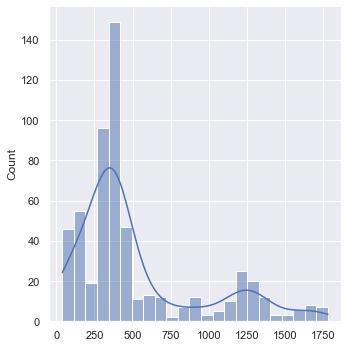

In [104]:
gold=np.array(dff['Gold'])
sns.displot(gold, kde=True)

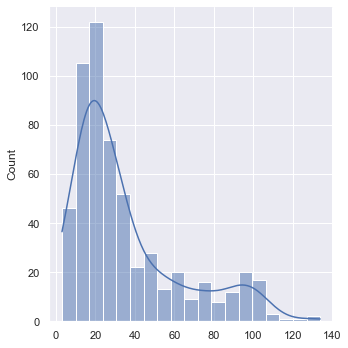

In [105]:
Oil=np.array(dff['Oil'])
sns.displot(Oil, kde=True)

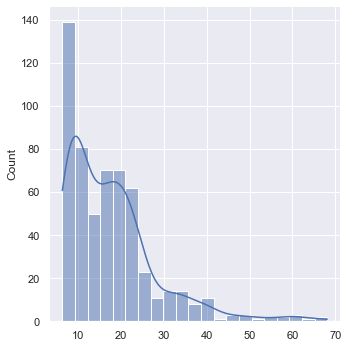

In [106]:
silver=np.array(dff['Silver'])
sns.displot(silver, kde=True)

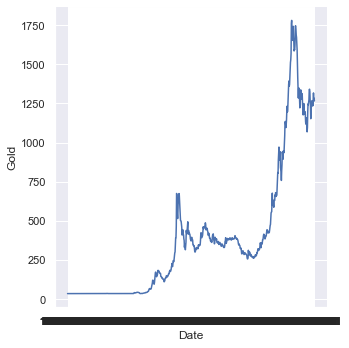

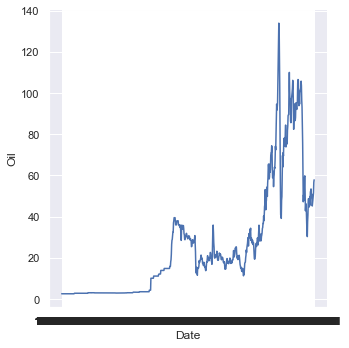

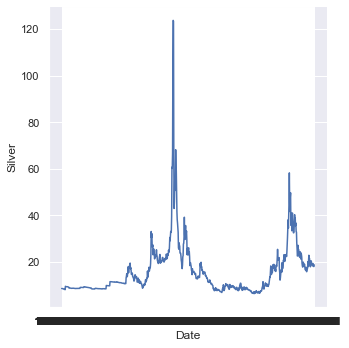

In [107]:
sns.relplot(kind='line', y=df['Gold'], x=df['Date'])
sns.relplot(kind='line', y=df['Oil'], x=df['Date'])
sns.relplot(kind='line', y=df['Silver'],x=df['Date'])

Это мы смотрели динамику изменения наших активов, а теперь давайте посмотрим, как инфляция может быть связана с активами и вообще другими показателями!

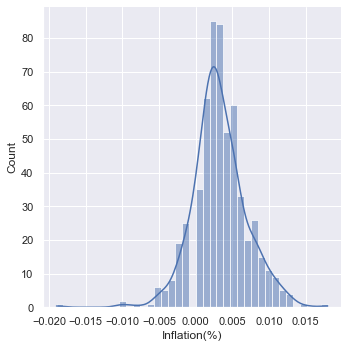

In [108]:
sns.displot(data=dff['Inflation(%)'], kde=True)

Класс!! Наше значение инфляции имеет распределение, очень напоминающее нормальное.

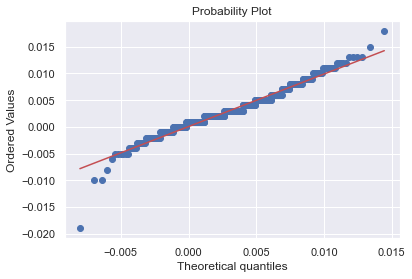

In [109]:
import scipy.stats as sts
sts.probplot(dff['Inflation(%)'], dist='norm', sparams=(dff['Inflation(%)'].mean(), dff['Inflation(%)'].std()), plot=plt)
plt.show()

В целом, можем найти мат. ожидание и дисперсию для темпа инфляции. 

In [110]:
dff['Inflation(%)'].mean()

0.0032171628721540933

In [242]:
dff['Inflation(%)'].std()

0.0037051580461716213

А теперь посмотрим на то, что с чем как коррелируется.

<AxesSubplot:>

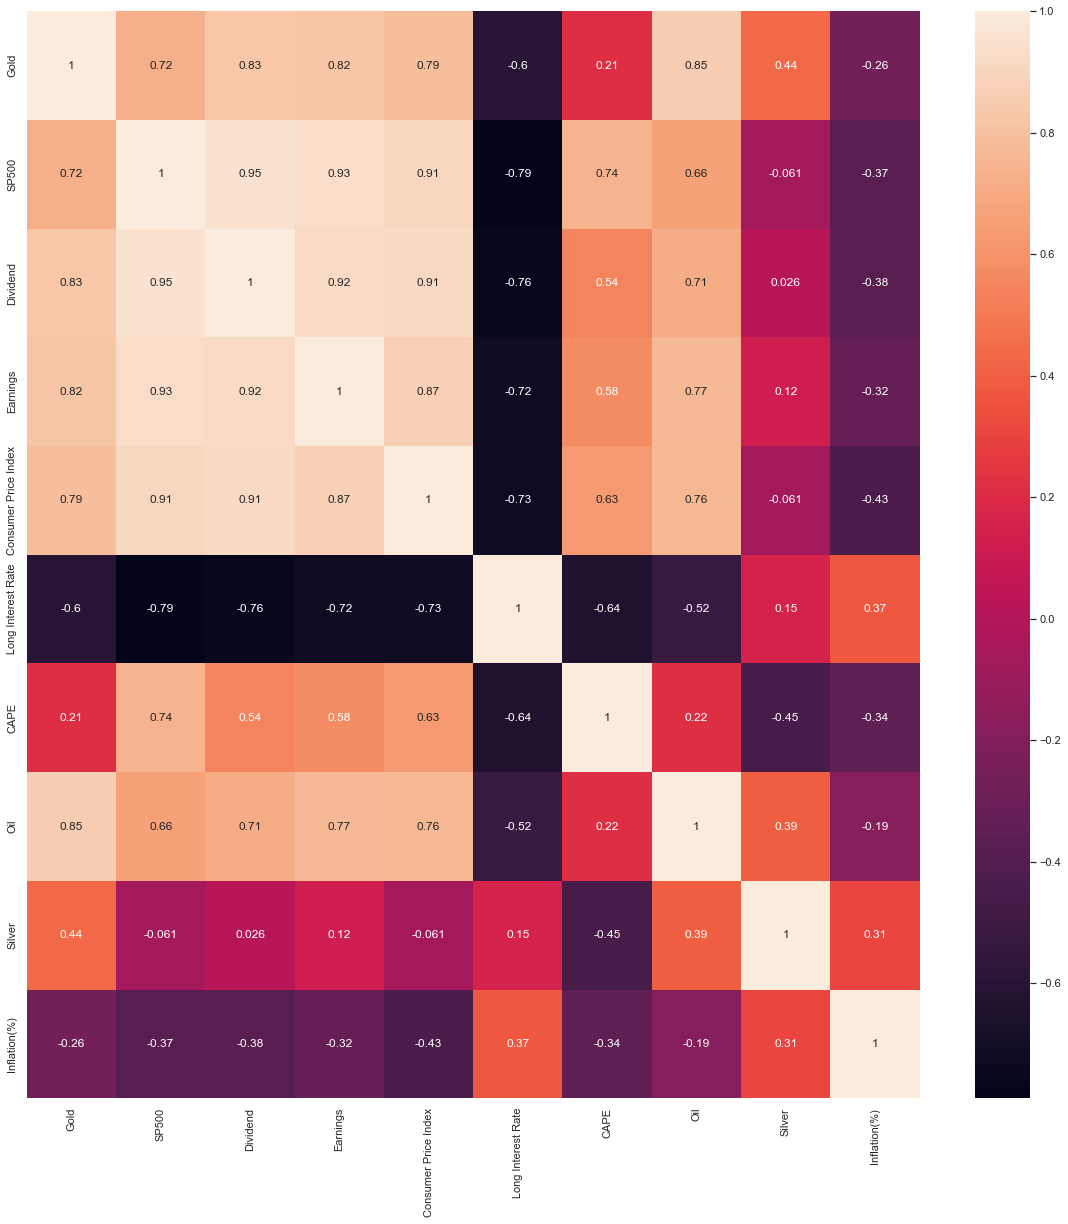

In [111]:
plt.figure(figsize=(20,20))
sns.heatmap(dff.corr(), annot=True, )

И так, для начала посмотрим на самые высокие значения корелляций.

In [233]:
df_cor=df.corr()
a=[]
for i in enumerate(df_cor):
    a.extend(sorted(np.array(df_cor[i[1]]),reverse=True))
a=np.unique(a)
a[a==1]=0
d=sorted(a,reverse=True)[:3]
d

[0.9635202058425552, 0.948465687981616, 0.9391660272961445]

Мы вывели 3 самых больших значений корелляции. Именно их мы подробно и изучим.

Давайте выведем эти пары значений.

In [239]:
ss=sorted(a,reverse=True)[:3]
first_pair=[]
second_pair=[]
third_pair=[]
df_cor1=df_cor[df_cor==d[0]]
w=np.array(df_cor1.isnull().min())
first_pair.extend([df_cor1.columns[list(np.where(w==0)[0])[0]], df_cor1.columns[list(np.where(w==0)[0])[1]]])
df_cor2=df_cor[df_cor==d[1]]
w=np.array(df_cor2.isnull().min())
second_pair.extend([df_cor2.columns[list(np.where(w==0)[0])[0]], df_cor2.columns[list(np.where(w==0)[0])[1]]])
df_cor3=df_cor[df_cor==d[2]]
w=np.array(df_cor3.isnull().min())
third_pair.extend([df_cor3.columns[list(np.where(w==0)[0])[0]], df_cor3.columns[list(np.where(w==0)[0])[1]]])

['Dividend', 'Earnings']

<AxesSubplot:xlabel='Dividend', ylabel='Earnings'>

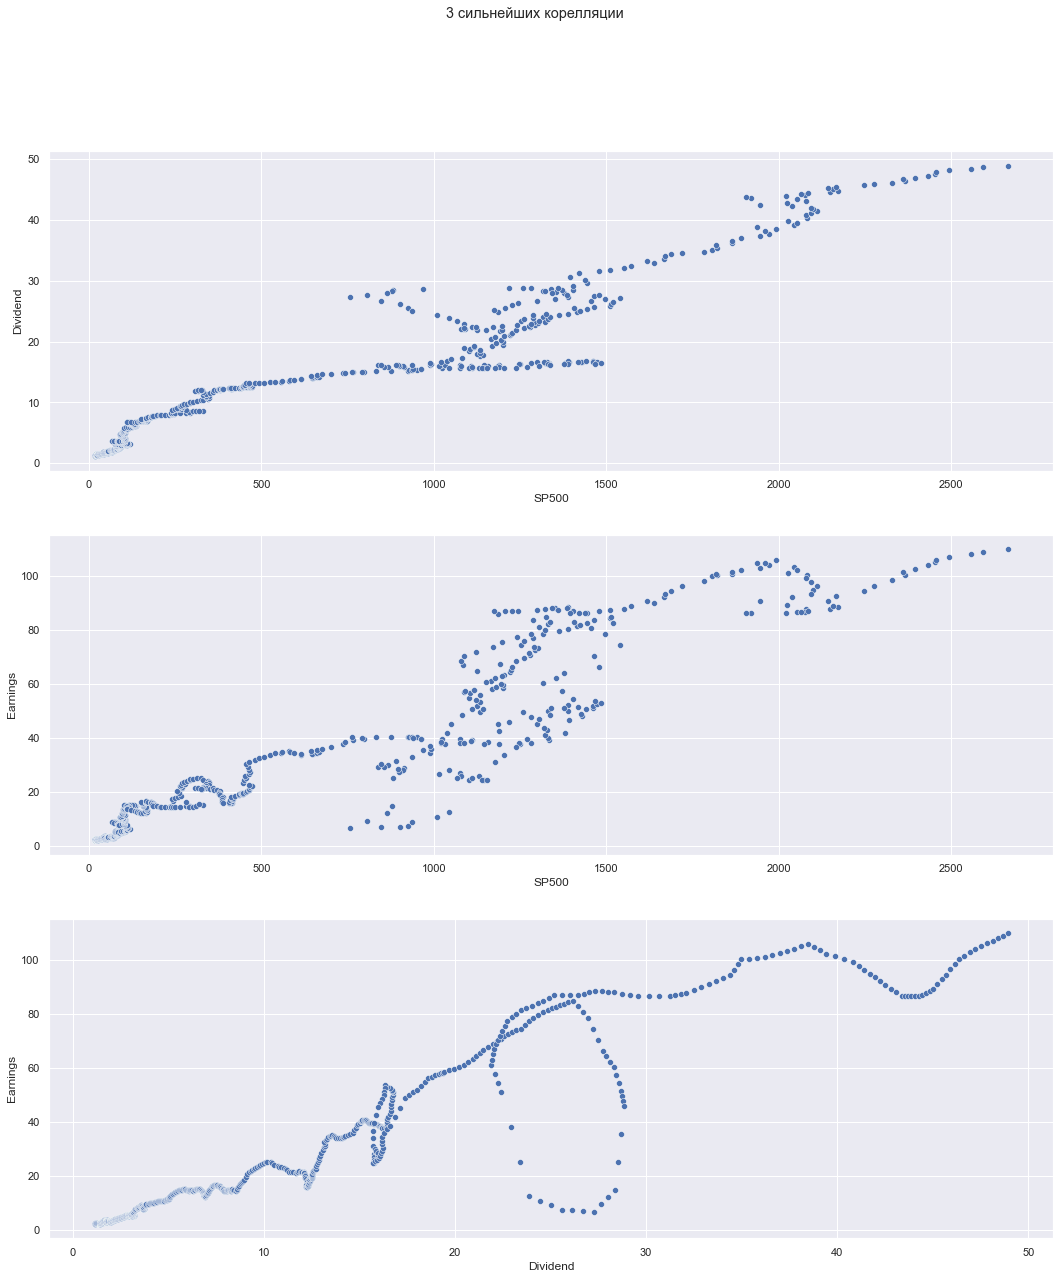

In [240]:
fig, axes = plt.subplots(3, figsize=(18,20))
fig.suptitle('3 сильнейших корелляции')
sns.scatterplot(data=df, ax=axes[0] , x=first_pair[0], y=first_pair[1])
sns.scatterplot(data=df, ax=axes[1], x=second_pair[0], y=second_pair[1])
sns.scatterplot(data=df, ax=axes[2], x=third_pair[0], y=third_pair[1])

Мы хотим выдвинуть следующие гипотезы. 

1) H$_0$: Золото растет быстрее в периоды высокой инфляции.
   H$_1$: Золото не растет быстрее в периоды высокой инфляции.

2) H$_0$: Темпы месячной инфляции имеют нормальное распределение.
   H$_1$: Темпы месячной инфляции не имеют нормальное распределение.

3)H$_0$: Во время рецессии рынка золото растет в цене.
   H$_1$: Во время рецессии рынка золото не растет в цене.

На данный момент это только возможные гипотезы, мы добавим еще несколько, возможно. 

Мы собираемся предсказывать цену золота или серебра. Или же создадим признак, который будет определять рецессия или нет на рынке. Именно этот признак можно предсказывать.